# Dataset
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine


#Summary:


#Analyze the Data Set:
  
  The shape of the features is a (178,13) matrix and the target was an array of size (178,). Once appended the two make a matrix of shape (178,14). For the driscription of the minimum, maximum, average values of each feature label and target, they are as follows(Also shown in code):
*   
  alchol: min=11.03  ;  max=14.83  ;  average=13.00  
*  
  malic acid: min=0.7400 ;  max=5.800  ;  average=2.336
*  
  ash: min=1.360  ;  max=3.230  ;  average=2.367 
*   
  alcalinity_of_ash: min=10.60  ;  max=30.00  ;  average=19.49
*  
  magnesium: min=70.00  ;  max=162.0  ;  average=99.74 
*   
  total phenols: min=0.9800  ;  max=3.880  ;  average=2.295
*   
  flavanoids: min=0.3400  ;  max=5.080  ;  average=2.029 
*   
  nonflavanoid phenols: min=0.1300  ;  max=0.6600  ;  average=0.3619
*   
  proanthocyanins: min=0.4100  ;  max=3.580  ;  average=1.591 	
*   
  color_intensity: min=1.280  ;  max=13.00  ;  average=5.058 
*   
  hue: min=0.4800  ;  max=1.710  ;  average=0.9574 
*   
  od280/od315_of_diluted_wines: min=1.270  ;  max=4.000  ;  average=2.612
*   
  proline: min=278.0  ;  max=1680  ;  average=746.9
*   
  target: min=0  ;  max=2.000  ;  average=0.9382 


`



  Finally for the analysis, we  have our scatter matrix. For most of the scatter plots, the data semms random; however, there are a few plots that are strongly correlated such as the: 
*   
  alcohol vs color intensity plot;

*    
  flavanoids vs nonflavanoid phenols plot;
*   
  color intensity vs nonflavanoid phenols plot;
*   
  proline vs nonflavanoid phenols plot;

There are other plots that show correlation; however, these were the strongest and coinsidentally most involved nonflavanoid phenols.


In [1]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.datasets import load_wine

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = load_wine()

1. Output the shape of the data set

In [2]:
features, target = load_wine(return_X_y=True)
dataset = np.append(features, np.asmatrix(target).T, axis=1)
print(f'Features - {len(features)}')
print(f'target - {len(target)}')
print(f'Total Dataset - {dataset.data.shape}')

Features - 178
target - 178
Total Dataset - (178, 14)


2. Describe the minimum, maximum, and average values for each of the features and the target labels.

In [3]:
wine = pd.DataFrame(features, columns=list(data.feature_names))
wine["target"] = data.target
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


3. Implement a scatter matrix to determine if any features strongly correlate.

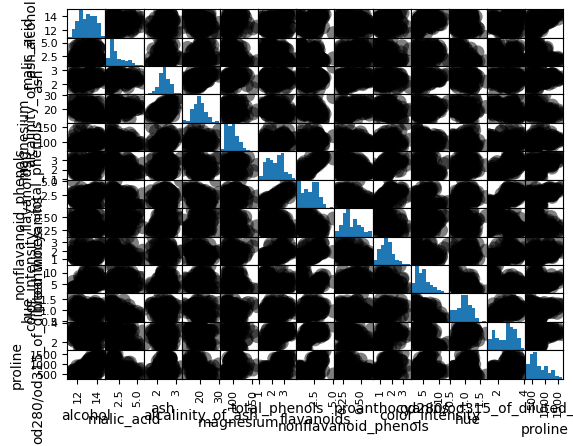

In [4]:
df = pd.DataFrame(data.data, columns = data.feature_names)
pd.plotting.scatter_matrix(df,s=400,c='black')
plt.rcParams["figure.figsize"] = (100, 100)
plt.savefig('confusion_matrix')

4. Pre-process the data as necessary to ensure that all values can be processed by a classification model.

In [5]:
wine = datasets.load_wine() 
X, y = wine.data[:, :], wine.target
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0, train_size = 0.7)

scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

5. Develop, train, and demonstrate performance by plotting the ROC curve, showing the confusion matrix, showing the performance (accuracy, precision, recall, f1 score) for the following configurations:  
  
o K-Nearest Neighbors  